In [13]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [14]:
pd.__version__

'0.24.2'

In [15]:
detik = pd.read_html('https://www.detik.com/pemilu/hitung-suara-kpu')[0]
pemilu = detik.iloc[:]

print(pemilu)

                      Wilayah (01) Joko Widodo - Ma'ruf Amin  \
0                        Bali                      2.351.057   
1                      Banten                      2.537.524   
2                    Bengkulu                        583.488   
3             D.I. Yogyakarta                      1.655.174   
4                 DKI Jakarta                      3.279.547   
5                   Gorontalo                        369.803   
6                       Jambi                        859.833   
7                  Jawa Barat                     10.750.568   
8                 Jawa Tengah                     16.825.511   
9                  Jawa Timur                     16.231.668   
10           Kalimantan Barat                      1.709.896   
11         Kalimantan Selatan                        823.939   
12          Kalimantan Tengah                        830.948   
13           Kalimantan Timur                      1.094.845   
14           Kalimantan Utara           

In [16]:
type(pemilu)

pandas.core.frame.DataFrame

In [17]:
len(pemilu)

34

In [18]:
jumlahSuara = {}

for row in pemilu.iterrows():
    series = row[1]
    for key in series.keys():
        if (key != "Wilayah"):
            if key in jumlahSuara.keys():
                jumlahSuara[key]+=int(series[key].replace(".", ""))
            else:
                jumlahSuara[key]=int(series[key].replace(".", ""))

for key in jumlahSuara:
    print("{} = {:,} suara".format(key, jumlahSuara[key]))

(01) Joko Widodo - Ma'ruf Amin = 85,036,798 suara
(02) Prabowo Subianto - Sandiaga Uno = 68,442,493 suara


In [19]:
indonesiaBarat = ["Nanggroe Aceh Darusalam", "Sumatera Barat", "Sumatera Selatan", "Sumatera Utara", "Riau", "Kepulauan Riau",
           "Bengkulu", "Lampung", "Kepulauan Bangka Belitung", "Jambi","Jawa Barat", "Jawa Tengah", "Jawa Timur", "Banten",
            "DKI Jakarta", "D.I. Yogyakarta","Kalimantan Barat","Kalimantan Tengah"]
indonesiaTengah = ["Kalimantan Utara","Kalimantan Selatan", "Kalimantan Timur", "Sulawesi Utara","Sulawesi Tenggara",
                   "Sulawesi Selatan","Sulawesi Tengah","Sulawesi Barat","Gorontalo", "Nusa Tenggara Barat", "Nusa Tenggara Timur", "Bali"]
indonesiaTimur = ["Maluku", "Maluku Utara", "Papua", "Papua Barat"]

In [26]:
suaraRegional = {"Indonesia Barat": [0,0], "Indonesia Tengah": [0,0], "Indonesia Timur": [0,0]}

totalJokowi = 0
totalPrabowo = 0

res = {}

def tambahSuara(key, province, value):
    idx = 0 if (key==1) else 1
    
    if province in indonesiaBarat:
        suaraRegional["Indonesia Barat"][idx]+=value
    elif province in indonesiaTengah:
        suaraRegional["Indonesia Tengah"][idx]+=value
    else:
        suaraRegional["Indonesia Timur"][idx]+=value
        
for (key, series) in pemilu.iterrows():
    for key in series.keys():
        if (key != "Wilayah"):
            val = int(series[key].replace(".", ""))
            if (key=="(01) Joko Widodo - Ma'ruf Amin"):
                tambahSuara(1, series["Wilayah"], val)
                totalJokowi+=val
            else:
                tambahSuara(2, series["Wilayah"], val)
                totalPrabowo+=val
                
print(suaraRegional["Indonesia Barat"])

[67104327, 56960959]


[134208654, 113921918]


{'Indonesia Barat': [67104327, 56960959], 'Indonesia Tengah': [13491756, 10303687], 'Indonesia Timur': [4440715, 1177847]}


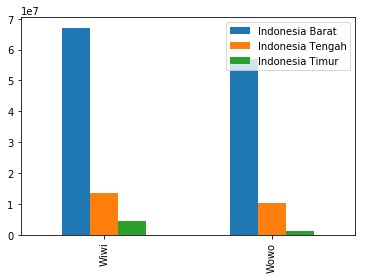

In [27]:
print(suaraRegional)
suaraRegdf = pd.DataFrame(suaraRegional, index=["Wiwi", "Wowo"])

%matplotlib inline
suaraRegdf.plot.bar()

In [23]:
suaraRegdf

Indonesia Barat  Indonesia Tengah  Indonesia Timur
Wiwi        134208654          26983512          8881430
Wowo        113921918          20607374          2355694